In [ ]:
# Price prediction purchase & accuracy of used cars #

In [309]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# vehicle_df = pd.read_csv('Desktop/used_cars_prices_data.csv')
vehicle_df = pd.read_csv('Desktop/cleaned_used_cars_prices_datafile.csv')

# Replacing the missing numerical values with 0 using pandas method  fillna()  
# Removing the duplicate rows based on all columns which helps to  eliminate redundant data which may skew the results. 
# Method used is  drop_duplicates() with parameter inplace=True  
# Converting the data type for the below columns to int type from  floating\decimal 1. Year 2. Seller Reviews Count 3. Car Reviews Count 4. Mileage  
# Saved the new file with name ‘cleaned_used_cars_prices_datafile.csv’ 

#Start - Cleaning the data
vehicle_df.fillna(0, inplace=True)
vehicle_df.drop_duplicates(inplace=True)
vehicle_df['Year'] = vehicle_df['Year'].astype(int)
vehicle_df['Seller Reviews Count'] = vehicle_df['Seller Reviews Count'].astype(int)
vehicle_df['Car Reviews Count'] = vehicle_df['Car Reviews Count'].astype(int)
vehicle_df['Mileage'] = vehicle_df['Mileage'].astype(int)
vehicle_df.head()
vehicle_df.to_csv('Desktop/cleaned_used_cars_prices_datafile.csv', index=False)
#End - Cleaning the data


Manufacturer
Ford         786
Chevrolet    752
Toyota       480
Jeep         459
Nissan       431
Name: count, dtype: int64


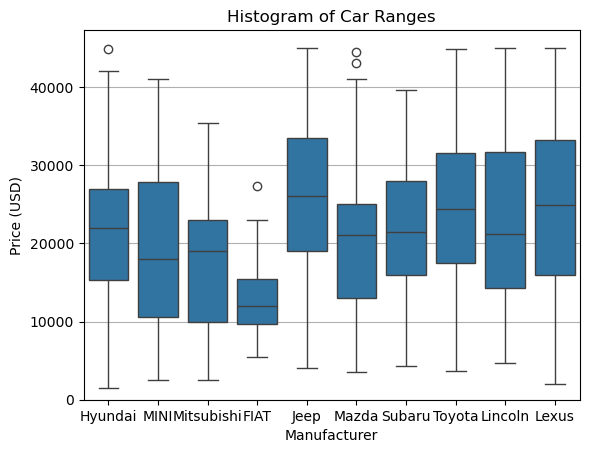

In [317]:
# Used set_index() method over the columns - Year & Manufacturer which helps to access and analyze the data efficiently. 
vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:10].tolist())].set_index(['Year','Manufacturer'])

vehicle_df_1.hist("Price (USD)")
plt.title("Histogram of Car Ranges")
sns.boxplot(data=vehicle_df_1, x="Manufacturer", y="Price (USD)")
plt.savefig("img/UsedCars_hist_img.png")

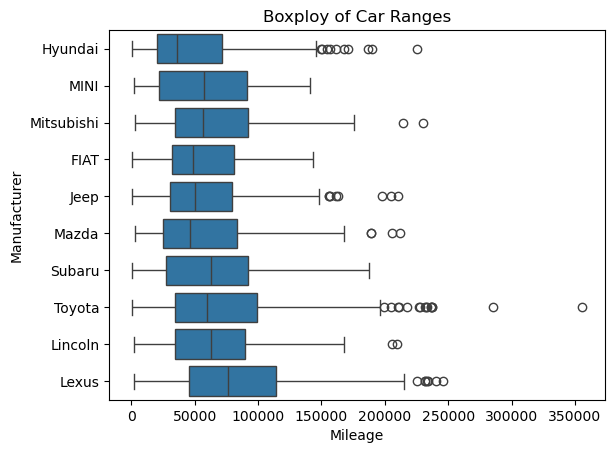

In [319]:
vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:10].tolist())].set_index(['Mileage','Manufacturer'])

# Prepared Box Plot from seaborn library to understand the price range of the first 10 cars. 
# As per the outcome, manufacturers - Toyota & Lexus looks best pick. 
# Prepared Histogram from seaborn understand the price range of the first 10 cars. 
# Out of 10 cars, Jeep is the costliest and FIAT is the cheapest car.  
plt.title("Boxploy of Car Ranges")
sns.boxplot(data=vehicle_df_1, x="Mileage", y="Manufacturer")
plt.savefig("img/UsedCars_Boxplot_img.png")

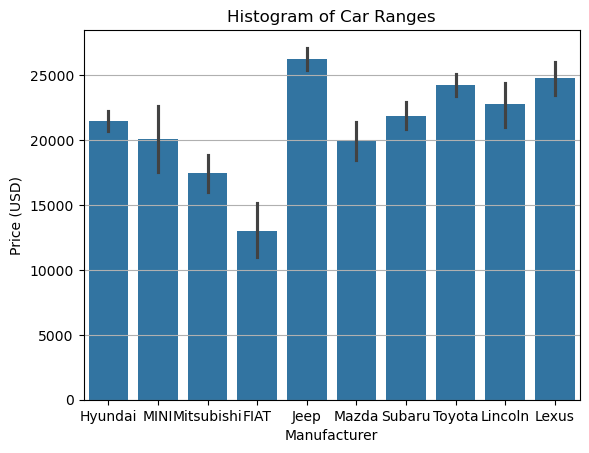

In [239]:
# Prepared Line Plot from seaborn library to find the price trend of 10 top cars of which jeep stands highest

vehicle_df_1.hist("Price (USD)")
plt.title("Histogram of Car Ranges")
sns.barplot(data=vehicle_df_1, x="Manufacturer", y="Price (USD)")
plt.savefig("img/UsedCars_Barplot_img.png")

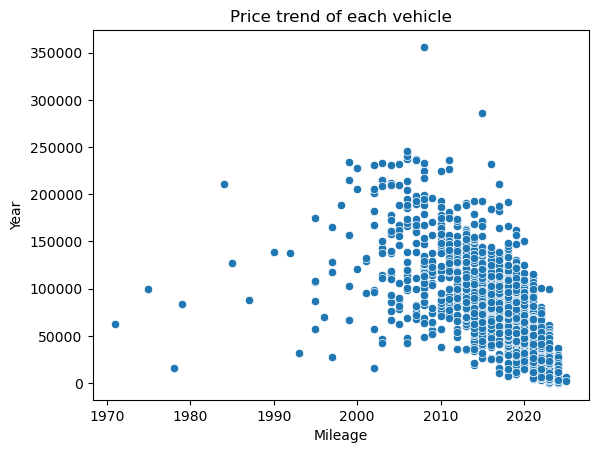

In [321]:
# Prepared Line Plot from seaborn library to find the price trend of the top 3 unique cars - Hyundai,MINI & Mitsubishi 

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:10].tolist())].set_index(['Mileage','Year'])
sns.scatterplot(data=vehicle_df_1, x="Year", y="Mileage")
plt.title('Price trend of each vehicle')
plt.xlabel('Mileage')
plt.ylabel('Year')
plt.savefig("img/UsedCars_Scatterplot_img.png")

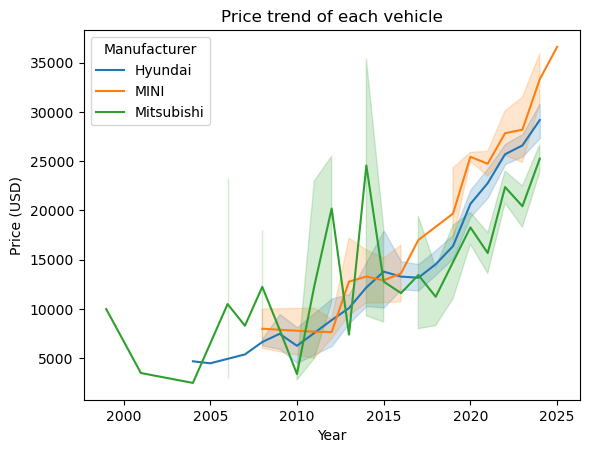

In [245]:
# Prepared Line Plot from seaborn library to find the price trend of the top 3 unique cars - Hyundai,MINI & Mitsubishi 

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:3].tolist())].set_index(['Year','Manufacturer'])
sns.lineplot(data = vehicle_df_1, x = 'Year', y = 'Price (USD)', hue = 'Manufacturer')
plt.title('Price trend of each vehicle')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.savefig("img/UsedCars_Lineplot_img.png")

In [285]:
# Using linear regression, predict the car price value based on one feature - [year of manufacture] , 2 features - [year of manufacture & Mileage] and 3 features - [year of manufacture, Mileage & customer review count]
# The below metrics are evaluated - Mean Squared Error & Mean Absolute Error
# Mean squared error is low considering single feature instead of multi feature consideration. Might be due to data!


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:50].tolist())].set_index(['Manufacturer'])

lr_1_feature = LinearRegression(fit_intercept=False).fit(vehicle_df_1[['Year']], vehicle_df_1['Price (USD)'])
print(lr_1_feature)

lr_2_features = LinearRegression(fit_intercept=False).fit(vehicle_df_1[['Year','Mileage']], vehicle_df_1['Price (USD)'])
print(lr_2_features)

lr_3_features = LinearRegression(fit_intercept=False).fit(vehicle_df_1[['Year','Mileage','Car Reviews Count']], vehicle_df_1['Price (USD)'])
print(lr_3_features)

pred1 = lr_1_feature.predict(vehicle_df_1[['Year']])
pred2 = lr_2_features.predict(vehicle_df_1[['Year','Mileage']])
pred3 = lr_3_features.predict(vehicle_df_1[['Year','Mileage','Car Reviews Count']])

error_dict = {'Features': ['1 Feature', '2 Features', '3 Features'],
'MSE': [mean_squared_error(vehicle_df_1['Price (USD)'], i) for i in [pred1, pred2, pred3]],
'MAE': [mean_absolute_error(vehicle_df_1['Price (USD)'], i) for i in [pred1, pred2, pred3]]}
error_df = pd.DataFrame(error_dict).set_index('Features')

Whether customer will purchase an used car using logistic regression? If yes, what all metrics to consider.
The below metrics are evaluated - accuracy,  precision and recall
All the above metrics resulted 1.0 error_df

LinearRegression(fit_intercept=False)
LinearRegression(fit_intercept=False)
LinearRegression(fit_intercept=False)


,MSE,MAE
Features,,
1 Feature,1.020009e+08,8331.281040
2 Features,6.218039e+07,6322.078233
3 Features,6.117368e+07,6269.612752


Accuracy:  1.00
Precision:  1.00
Recall:  1.00


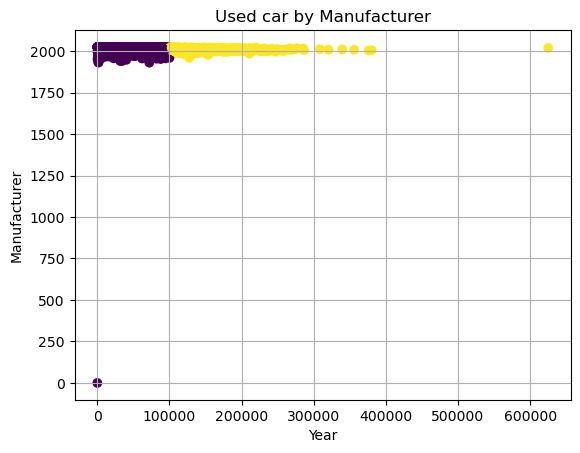

In [303]:
# Whether customer will purchase an used car using logistic regression? If yes, what all metrics to consider.
# The below metrics are evaluated - accuracy,  precision and recall
# All the above metrics resulted 1.0 

# Classification Baseline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

vehicle_df_1=vehicle_df[vehicle_df['Manufacturer'].isin(vehicle_df['Manufacturer'].unique()[:50].tolist())].set_index(['Manufacturer'])
X = vehicle_df_1[['Mileage']]
y = np.where(vehicle_df_1.Mileage <=100000, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

plt.scatter(X, vehicle_df_1.Year, c = y)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Manufacturer')
plt.title('Used car by Manufacturer')


logreg = LogisticRegression().fit(X_train, y_train)
predictions = logreg.predict(X_test)
preds = ''
accuracy = ''
precision = ''
recall = ''

### BEGIN SOLUTION
preds = logreg.predict(X_test)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
### END SOLUTION

# Answer check
print(f'Accuracy: {accuracy: .2f}\nPrecision: {precision: .2f}\nRecall: {recall: .2f}')